In [1]:
from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

In [2]:
#font_manager.findfont("Liberation Sans")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
import pandas as pd
path_to_utilsGRF_="../../../../repos/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)

from matplotlib.gridspec import GridSpec
import BoundaryFinder as BF
def plot_hillline(ax,nmin=1,nmax=1,colorl="gray",colordict=None,textonly=[],label=True):
    nrange=np.arange(1.4,nmax+0.2,0.05)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    if label:
        label="Hill line"
    else:
        label=None
    ax.plot(hillline[:,0],hillline[:,1],color=colorl,linestyle='-',label=label)
        
    for n in range(nmin,nmax):
        ph,sh=BF.position_steepness_hill(n)
        if colordict is None:
            color=colorl
        else:
            color=colordict[n]
        ax.scatter(ph,sh,color=colorl,marker="x",s=60)
        if n in textonly:
            ax.text(ph+0.02,sh-0.05,'%d'%n,color=color)
        
    #ax.legend()
    #ax.set_xlim(0.499,1.2)
    #ax.set_xlabel('position')
    #ax.set_ylabel('steepness')
    return ax


In [4]:
from matplotlib import rcParams
#rcParams.update({
#   'font.family':'sans-serif',
#    'font.sans-serif':['Liberation Sans'],
#    })
rcParams["font.size"]=14


In [5]:


foldernew="../boundaryanalysis_notebooks/ashapes"   
ashape_all=np.load(os.path.join(foldernew,"N4univ_allregion_2_2_stitched_2023_5_11.npy")) #from 2022_04_20_stitch_allN4univregion_together
ashape_N6=np.load(os.path.join(foldernew,"ashape_N6univ_3_2022_8_23.npy"))

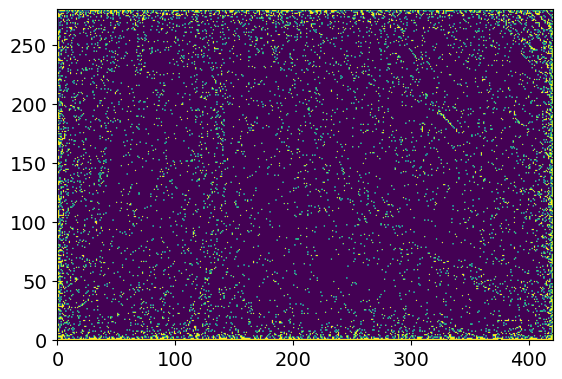

In [6]:
xlim0=0.6
xlim1=1.2
ylim0=0.8
ylim1=1.2

step=0.005
stp_ar=np.arange(0.3,1.7+step,step)
pos_ar=np.arange(0.4,2.5+step,step)
#executed in notebook Fig5-noconstraintsGRF_runboundary
mat_N4points_noconstraints=np.load("../aux_notebooks/N4univnoconstraints_out/final_results/mat_N4univnoconstraints_1_last.npy")
plt.imshow(mat_N4points_noconstraints,origin="lower")

#pick the points that are outside the boundary
np.random.seed(1)
points=[]
for row in range(len(mat_N4points_noconstraints)):
    for col in range(len(mat_N4points_noconstraints[0])):
        if mat_N4points_noconstraints[row,col]>0:
            stp=stp_ar[row]
            pos=pos_ar[col]
            if pos>xlim0 and stp>ylim0:
            #now search for corresponding boundary
                idxs_x=np.where(((np.abs(ashape_all[0]-pos)<0.01)))[0]
                outside=True
                for idx in idxs_x:
                    stp_ashape=ashape_all[1][idx]
                    if stp_ashape>stp:
                        outside=False
                if outside:    
                    #ax2.scatter(ashape[0][idx],ashape[1][idx])
                    #if np.random.uniform()<0.8:
                    #ax2.scatter(pos,stp,color="dodgerblue")
                    points.append((pos,stp))

In [7]:
np.random.seed(3)
selection_points_noconstr=[]
for point in points:
    if True: #np.random.uniform()<0.4:
        selection_points_noconstr.append(point)

In [8]:
df=pd.read_csv("../aux_notebooks/points_noneqav4.df")
df["pos"]=pd.to_numeric(df["pos"])
df["stp"]=pd.to_numeric(df["stp"])
df.head()

,pos,stp,p0,p1,p2,p3,p4,p5,p6,p7,...,p54,p55,p56,p57,p58,p59,p60,p61,p62,p63
0,0.708955,0.997399,138.017549,1000.000000,0.001000,7.858547,0.002070,77.213543,0.001387,0.001000,...,0.001125,33.771345,0.003448,0.001000,1.456769,35.501909,6.608102,0.003974,0.00100,0.001000
1,0.701905,1.001920,0.002010,1.572062,0.001000,0.001000,0.001138,0.003599,2.222540,1000.000000,...,0.001081,0.027584,0.001000,0.001764,0.843593,0.003217,1000.000000,2.553827,1000.00000,0.001820
2,0.706559,1.014240,155.997493,1000.000000,0.001000,17.252584,0.005556,631.293229,0.002259,0.003014,...,0.001000,16.621547,0.003220,0.002726,0.190953,8.945968,3.507249,0.213339,0.00100,0.011362
3,0.709755,1.022790,0.002205,5.534273,0.001319,0.001000,0.001000,0.001000,8.875053,391.426132,...,0.009233,0.012454,0.002481,0.001000,0.001000,0.001000,1000.000000,2.412998,832.77916,0.061145
4,0.707015,1.030390,190.520503,1000.000000,0.003402,8.125383,0.001000,631.293229,0.001000,0.003014,...,0.001077,0.001000,0.003220,0.005801,1.456769,4.209702,0.976990,0.073158,0.00100,0.001000


In [9]:
    
np.random.seed(1)
idxs=np.random.choice(np.arange(len(df)),replace=False,size=200)
points_noneq=[]
for idx in idxs:
    row=df.iloc[idx]
    pos=row.values[0]
    stp=row.values[1]
    idxs_x=np.where(((np.abs(ashape_all[0]-pos)<0.01)))[0]
    outside=True
    for idx in idxs_x:
        stp_ashape=ashape_all[1][idx]
        if stp_ashape>stp:
            outside=False
    if outside:    
        points_noneq.append([pos,stp])
points_below=[]
points_above=[]
pH4,sH4=BF.position_steepness_hill(4)

for point in points_noneq:
    if point[0]>xlim0 and point[0]<xlim1 and point[1]>ylim0 and point[1]<ylim1:
        if point[0]>pH4 and point[1]>sH4:
            points_above.append(point)
        else:
            points_below.append(point)
    else:
        print("outside",point)
allpoints=points_below+points_above
selection_points_noneq=allpoints

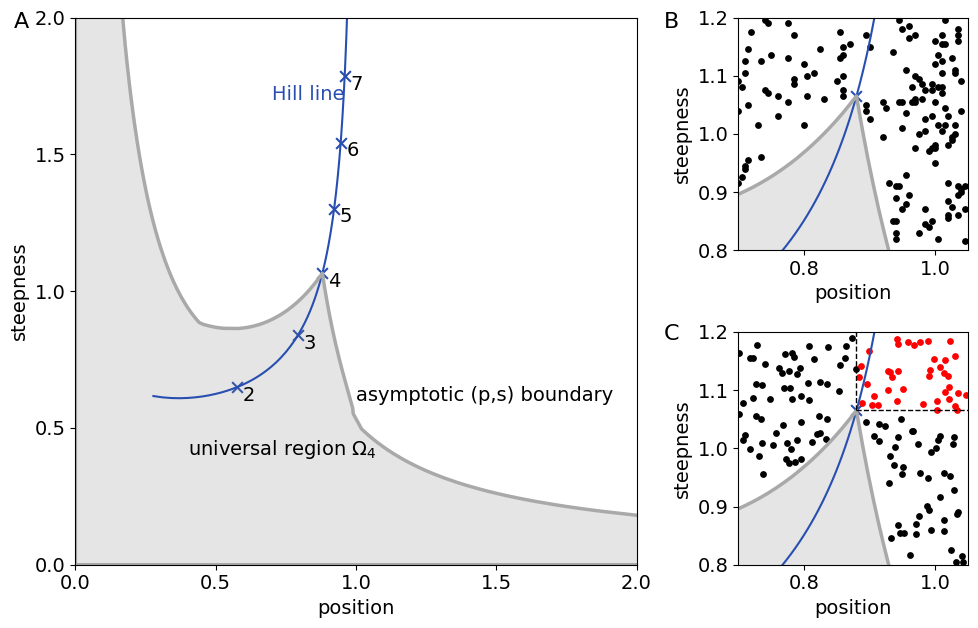

In [10]:
colorhill="#3b5db3"
colorhill="#284fb0"
colorb="darkgray"
boundarywidth=2.5
scattersize=15
max_=2

xlim0=0.7
xlim1=1.05
position_name="position"
steepness_name="steepness"

fig=plt.figure(figsize=(10.,6.5))

gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[:, 0:4])
ax2 = fig.add_subplot(gs[0, 4:])
ax3 = fig.add_subplot(gs[1:, 4:])

ax1=plot_hillline(ax1,nmin=2,nmax=8,textonly=[2,3,4,5,6,7],colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"})
ax1.text(0.7,1.7,"Hill line",color=colorhill)
ax2=plot_hillline(ax2,nmin=4,nmax=5,colorl=colorhill)
ax3=plot_hillline(ax3,nmin=4,nmax=5,colorl=colorhill)

for ax in [ax1,ax2,ax3]:
    ax.plot(ashape_all[0],ashape_all[1],color=colorb,linestyle="-",linewidth=boundarywidth)
    ax.fill(ashape_all[0],ashape_all[1],color="gray",alpha=0.2)

for point in selection_points_noconstr:
    if point[0]>xlim0 and point[0]<xlim1 and point[1]>ylim0 and point[1]<ylim1:
        if point[0]>pH4 and point[1]>sH4:
            color="k" #could be changed to another color but in this case we leave all black
        else:
            color="k"
        ax2.scatter(point[0],point[1],color=color,s=scattersize)

np.random.seed(1)
for point in selection_points_noneq:
    if point[0]>pH4 and point[1]>sH4:
        color="r"
    else:
        color="k"
    if np.random.uniform()<0.8:#do not show all so the density of points is more similar to the unconstrained

        ax3.scatter(point[0],point[1],color=color,s=scattersize)


ax1.set_xlim(0,max_)
ax1.set_ylim(0,max_)
ax1.set_xticks(np.arange(0,max_,1))
ax1.text(0.4,0.4,"universal region $\Omega_4$")
ax1.text(1,0.6,"asymptotic (p,s) boundary")

ax2.set_xlim(xlim0,xlim1)
ax2.set_ylim(ylim0,ylim1)
#ax2.set_title(r"$\alpha_i \lessgtr \beta_i$")


ax3.set_xlim(xlim0,xlim1)
ax3.set_ylim(ylim0,ylim1)
ax3.plot([pH4,xlim1],[sH4,sH4],linestyle="--",color="k",linewidth=1)
ax3.plot([pH4,pH4],[sH4,ylim1],linestyle="--",color="k",linewidth=1)
#ax3.set_title("non-equilibrium regulation")


ax1.set_yticks(np.arange(0,max_+0.5,0.5))
ax1.set_xticks(np.arange(0,max_+0.5,0.5))

fig.text(0.025,0.94,"A",fontsize=16)
fig.text(0.675,0.94,"B",fontsize=16)
fig.text(0.675,0.46,"C",fontsize=16)

for ax in [ax1,ax2,ax3]:
    ax.set_xlabel(position_name)
    ax.set_ylabel(steepness_name)
plt.tight_layout()
#plt.savefig("../figs/Fig5.pdf",bbox_inches="tight") 

plt.show()

In [51]:
import matplotlib.ticker as mtick

0.880015 0.880165 1.0651 1.06525


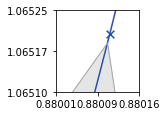

In [112]:
colorhill="#3b5db3"
colorhill="#284fb0"
colorb="darkgray"
boundarywidth=2.5
scattersize=15
max_=2

xlim0=0.7
xlim1=1.05
position_name="position"
steepness_name="steepness"

fig,ax1=plt.subplots(1,1,figsize=(1.5,1.5))


ax1=plot_hillline(ax1,nmin=2,nmax=8,textonly=[],colorl=colorhill,colordict={2:"k",3:"k",4:"k",5:"k",6:"k",7:"k"})

ax1.plot(ashape_all[0],ashape_all[1],color=colorb,linestyle="-",linewidth=1)
ax1.fill(ashape_all[0],ashape_all[1],color="gray",alpha=0.2)

dt=0.00015
#xmin=0.88+0.65*dt
#xmax=xmin+0.7*dt #0.8802
#ymin=1.0651+0.6*dt
#ymax=ymin+0.7*dt #1.06525

xmin=0.88+0.1*dt
xmax=xmin+dt #0.8802
ymin=1.0651
ymax=ymin+dt #1.06525

print(xmin,xmax,ymin,ymax)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
#ax1.set_xticks(np.arange(0,max_,1))
#ax1.text(0.4,0.4,"universal region $\Omega_4$")
#ax1.text(1,0.6,"asymptotic (p,s) boundary")


ax1.set_yticks(np.linspace(ymin,ymax,3))
ax1.set_xticks(np.linspace(xmin,xmax,3))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))
ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.5f'))
#plt.tight_layout(aspect=)
plt.savefig("../figs/Fig3_inset.svg",bbox_inches="tight") 

plt.show()